# This notebook will serve as a guide for exploring the data within our dataset

We will aim to understand the sizes of images and attempt to find some form of standardization

### We will start by getting the paths to our files. Please ensure that the file structure is identical to that outlined in the README

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

cur_path = os.getcwd()  # This is the full path to the notebook that we are in now
repo_ind = len(cur_path) - cur_path[::-1].index('\\') - 1
repo_path = cur_path[:repo_ind]  # This is the full path to the repository (i.e. parent of the notebook)
print("REPO PATH:", repo_path)
directory_ind = len(repo_path) - repo_path[::-1].index('\\')

directory_path = repo_path[:directory_ind]  # This is the full path to the directory containing repo and data
print("DIRECTORY PATH", directory_path)

data_path = directory_path + 'data\\'  # data_path is the path into the data folder

original_data_path = data_path + 'OriginalDataset\\'  # path to the original dataset in data directory
augmented_data_path = data_path + 'AugmentedAlzheimerDataset\\'  # path to augmented dataset in data directory

# Here is an example of how we can access the names of each of the images in our directory
os.listdir(original_data_path + 'MildDemented\\')[0:3]

REPO PATH: C:\Users\12057\OneDrive\Desktop\Vanderbilt Schoolwork\Spring 2023\Foundations of Machine Learning\Project\Code\Alzheimers-Classification
DIRECTORY PATH C:\Users\12057\OneDrive\Desktop\Vanderbilt Schoolwork\Spring 2023\Foundations of Machine Learning\Project\Code\


['26 (19).jpg', '26 (20).jpg', '26 (21).jpg']

### Throughout this process, we will be loading images from our dataset. Here is an example of how we can both load the image and get the dimensions of that image

The height of the image is:  208
The width of the image is:  176


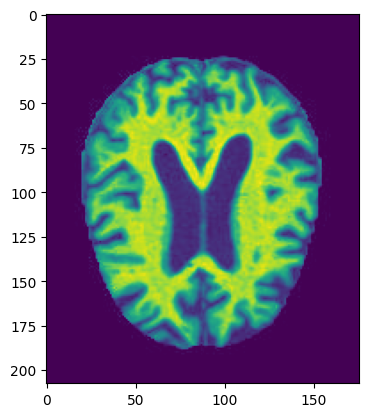

In [4]:
example_image = os.listdir(original_data_path + 'MildDemented\\')[0]
new_image = plt.imread(original_data_path + 'MildDemented\\' + example_image)
img = plt.imshow(new_image)

# get image
filepath = original_data_path + 'MildDemented\\' + example_image
img = Image.open(filepath)
  
# get width and height
width,height = img.size
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

In [5]:
# We are aiming to iterate over all images in the MildDemented folder
# Here is an example of how we would do that (only printing out 5 elements)
counter = 0
for image in os.listdir(original_data_path + 'MildDemented'):
    if counter < 5:
        print(original_data_path + 'MildDemented\\' + image)
    else:
        break
    counter += 1

C:\Users\12057\OneDrive\Desktop\Vanderbilt Schoolwork\Spring 2023\Foundations of Machine Learning\Project\Code\data\OriginalDataset\MildDemented\26 (19).jpg
C:\Users\12057\OneDrive\Desktop\Vanderbilt Schoolwork\Spring 2023\Foundations of Machine Learning\Project\Code\data\OriginalDataset\MildDemented\26 (20).jpg
C:\Users\12057\OneDrive\Desktop\Vanderbilt Schoolwork\Spring 2023\Foundations of Machine Learning\Project\Code\data\OriginalDataset\MildDemented\26 (21).jpg
C:\Users\12057\OneDrive\Desktop\Vanderbilt Schoolwork\Spring 2023\Foundations of Machine Learning\Project\Code\data\OriginalDataset\MildDemented\26 (22).jpg
C:\Users\12057\OneDrive\Desktop\Vanderbilt Schoolwork\Spring 2023\Foundations of Machine Learning\Project\Code\data\OriginalDataset\MildDemented\26 (23).jpg


In [6]:
# Now iterating over all of the files in the original data set that are MildDemented
# Let's see how many unique sizes we have for the files
counter = 0  # counter to verify we actually went through all of the files
unique_sizes = set()
for image in os.listdir(original_data_path + 'MildDemented'):
    filepath = original_data_path + 'MildDemented\\' + image
    img = Image.open(filepath)
    unique_sizes.add(img.size)
    counter += 1

print("Accounted for {} images in the MildDemented directory".format(counter))
print("We have {} unique image size(s)".format(len(unique_sizes)))

Accounted for 896 images in the MildDemented directory
We have 1 unique image size(s)


### Great. It looks like all images in the MildDemented directory are of a standard size

### Now, let's look at the images across all directories in the original dataset

In [21]:
sub_directories = os.listdir(original_data_path)

# Create a dictionary to store the results of unique image sizes
sizes_dict = {}
for sd in sub_directories:
    sizes_dict[sd] = None  # Initialize to None

for dementia_severity in sub_directories:
    sub_dict = {}
    counter = 0  # counter to verify we actually went through all of the files
    unique_sizes = set()
    for image in os.listdir(original_data_path + dementia_severity):
        if counter == 0:
            print("Started processing for", dementia_severity)
        elif counter % 1000 == 0:
            print("\tProcessed {} images from {}".format(counter, dementia_severity))
        filepath = original_data_path + dementia_severity + '\\' + image
        img = Image.open(filepath)
        unique_sizes.add(img.size)
        counter += 1
    sub_dict['num_images'] = counter
    sub_dict['unique_sizes'] = unique_sizes
    
    sizes_dict[dementia_severity] = sub_dict
    print("Completed processing for", dementia_severity)

Started processing for MildDemented
Completed processing for MildDemented
Started processing for ModerateDemented
Completed processing for ModerateDemented
Started processing for NonDemented
	Processed 1000 images from NonDemented
	Processed 2000 images from NonDemented
	Processed 3000 images from NonDemented
Completed processing for NonDemented
Started processing for VeryMildDemented
	Processed 1000 images from VeryMildDemented
	Processed 2000 images from VeryMildDemented
Completed processing for VeryMildDemented


In [9]:
# We now have the number of images and the unique sizes in ALL directories of the original dataset
# Let's print it out in a readable way:
print("{")
for dem_sev in sizes_dict:
    print('\t' + dem_sev + ": {")
    if sizes_dict[dem_sev] is not None:
        for key in sizes_dict[dem_sev]:
            print('\t\t' + key + ':', sizes_dict[dem_sev][key])
        print('\t}')
print('}')

{
	MildDemented: {
		num_images: 896
		unique_sizes: {(176, 208)}
	}
	ModerateDemented: {
		num_images: 64
		unique_sizes: {(176, 208)}
	}
	NonDemented: {
		num_images: 3200
		unique_sizes: {(176, 208)}
	}
	VeryMildDemented: {
		num_images: 2240
		unique_sizes: {(176, 208)}
	}
}


### We can now see that there is a standard size for all images across the original dataset

### Let's move on to the Augmented Dataset

In [20]:
sub_directories = os.listdir(augmented_data_path)

# Create a dictionary to store the results of unique image sizes
sizes_dict = {}
for sd in sub_directories:
    sizes_dict[sd] = None  # Initialize to None

for dementia_severity in sub_directories:
    sub_dict = {}
    counter = 0  # counter to verify we actually went through all of the files
    unique_sizes = set()
    for image in os.listdir(augmented_data_path + dementia_severity):
        if counter == 0:
            print("Started processing for", dementia_severity)
        elif counter % 1000 == 0:
            print("\tProcessed {} images from {}".format(counter, dementia_severity))
        filepath = augmented_data_path + dementia_severity + '\\' + image
        img = Image.open(filepath)
        unique_sizes.add(img.size)
        counter += 1
    sub_dict['num_images'] = counter
    sub_dict['unique_sizes'] = unique_sizes
    
    sizes_dict[dementia_severity] = sub_dict
    print("Completed processing for", dementia_severity)

Started processing for MildDemented
	Processed 1000 images from MildDemented
	Processed 2000 images from MildDemented
	Processed 3000 images from MildDemented
	Processed 4000 images from MildDemented
	Processed 5000 images from MildDemented
	Processed 6000 images from MildDemented
	Processed 7000 images from MildDemented
	Processed 8000 images from MildDemented
Completed processing for MildDemented
Started processing for ModerateDemented
	Processed 1000 images from ModerateDemented
	Processed 2000 images from ModerateDemented
	Processed 3000 images from ModerateDemented
	Processed 4000 images from ModerateDemented
	Processed 5000 images from ModerateDemented
	Processed 6000 images from ModerateDemented
Completed processing for ModerateDemented
Started processing for NonDemented
	Processed 1000 images from NonDemented
	Processed 2000 images from NonDemented
	Processed 3000 images from NonDemented
	Processed 4000 images from NonDemented
	Processed 5000 images from NonDemented
	Processed 

In [11]:
# We now have the number of images and the unique sizes in ALL directories of the augmented dataset
# Let's print it out in a readable way:
print("{")
for dem_sev in sizes_dict:
    print('\t' + dem_sev + ": {")
    if sizes_dict[dem_sev] is not None:
        for key in sizes_dict[dem_sev]:
            print('\t\t' + key + ':', sizes_dict[dem_sev][key])
        print('\t}')
print('}')

{
	MildDemented: {
		num_images: 8960
		unique_sizes: {(180, 180), (200, 190)}
	}
	ModerateDemented: {
		num_images: 6464
		unique_sizes: {(180, 180), (200, 190)}
	}
	NonDemented: {
		num_images: 9600
		unique_sizes: {(180, 180), (200, 190)}
	}
	VeryMildDemented: {
		num_images: 8960
		unique_sizes: {(180, 180), (200, 190)}
	}
}


### We now run into issues. Not only is the augmented dataset not of an exact standard size, but none of the sizes match that of the original dataset. Let's investigate this further and determine how many of each size there are. This will give us a better indication of which data we should improve. It will also give us insights into whether image resizing would be appropriate

In [12]:
sub_directories = os.listdir(augmented_data_path)

# Create a dictionary to store the results of unique image sizes
sizes_dict = {}
for sd in sub_directories:
    sizes_dict[sd] = None  # Initialize to None

for dementia_severity in sub_directories:
    sub_dict = {}
    counter = 0  # counter to verify we actually went through all of the files
    unique_sizes = {}
    for image in os.listdir(augmented_data_path + dementia_severity):
        if counter == 0:
            print("Started processing for", dementia_severity)
        elif counter % 1000 == 0:
            print("\tProcessed {} images from {}".format(counter, dementia_severity))
        filepath = augmented_data_path + dementia_severity + '\\' + image
        img = Image.open(filepath)
        
        if img.size not in unique_sizes:
            # new img.size
            unique_sizes[img.size] = 1
        else:
            # img.size already seen
            unique_sizes[img.size] += 1
        counter += 1
    sub_dict['num_images'] = counter
    sub_dict['unique_sizes'] = unique_sizes
    
    sizes_dict[dementia_severity] = sub_dict
    print("Completed processing for", dementia_severity)

Started processing for MildDemented
	Processed 1000 images from MildDemented
	Processed 2000 images from MildDemented
	Processed 3000 images from MildDemented
	Processed 4000 images from MildDemented
	Processed 5000 images from MildDemented
	Processed 6000 images from MildDemented
	Processed 7000 images from MildDemented
	Processed 8000 images from MildDemented
Completed processing for MildDemented
Started processing for ModerateDemented
	Processed 1000 images from ModerateDemented
	Processed 2000 images from ModerateDemented
	Processed 3000 images from ModerateDemented
	Processed 4000 images from ModerateDemented
	Processed 5000 images from ModerateDemented
	Processed 6000 images from ModerateDemented
Completed processing for ModerateDemented
Started processing for NonDemented
	Processed 1000 images from NonDemented
	Processed 2000 images from NonDemented
	Processed 3000 images from NonDemented
	Processed 4000 images from NonDemented
	Processed 5000 images from NonDemented
	Processed 

In [13]:
print(sizes_dict)

{'MildDemented': {'num_images': 8960, 'unique_sizes': {(200, 190): 8064, (180, 180): 896}}, 'ModerateDemented': {'num_images': 6464, 'unique_sizes': {(200, 190): 6400, (180, 180): 64}}, 'NonDemented': {'num_images': 9600, 'unique_sizes': {(180, 180): 3200, (200, 190): 6400}}, 'VeryMildDemented': {'num_images': 8960, 'unique_sizes': {(200, 190): 6720, (180, 180): 2240}}}


In [19]:
# We now have the number of images and the unique sizes in ALL directories of the augmented dataset
# Let's print it out in a readable way:
print("{")
for dem_sev in sizes_dict:
    print('\t' + dem_sev + ": {")
    if sizes_dict[dem_sev] is not None:
        for key in sizes_dict[dem_sev]:
            if key == 'num_images':
                print('\t\tnum_images:', sizes_dict[dem_sev][key])
            else:
                print('\t\t' + key + ': {')
                for sub_key in sizes_dict[dem_sev][key]: 
                    print('\t\t\t' + str(sub_key) + ':', sizes_dict[dem_sev][key][sub_key])
                print('\t\t}')
        print('\t}')
print('}')

{
	MildDemented: {
		num_images: 8960
		unique_sizes: {
			(200, 190): 8064
			(180, 180): 896
		}
	}
	ModerateDemented: {
		num_images: 6464
		unique_sizes: {
			(200, 190): 6400
			(180, 180): 64
		}
	}
	NonDemented: {
		num_images: 9600
		unique_sizes: {
			(180, 180): 3200
			(200, 190): 6400
		}
	}
	VeryMildDemented: {
		num_images: 8960
		unique_sizes: {
			(200, 190): 6720
			(180, 180): 2240
		}
	}
}


### We now have a decision to make. Images of size (200, 190) are much more prevalent throughout the dataset as a whole; however, disregarding all (180, 180) images would mean that we do not account for over 5,000 images, which is definitely statistically significant.

### Right now, it looks like the best path to take is to resize images to (190, 185) - or some factor of this. More than likely (190, 185) will take FAR too long to train, but we'll have to see through a few tests once we begin development of the model.